In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
#train: 모델학습에 사용되는 훈련세트, test: 모델 테스트에 사용되는 테스트세트
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'shirt',
               'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape #총 70000개 이미지 중, 10000개는 test에 존재
test_images.shape #2차원 이미지. 28by28로 표현된 상태

"""
y값(train/test label 역시 600000, 10000)개
"""
train_labels 
"""
train_labes[0]은 9. 이 name는, Ankle_boot임.
"""

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

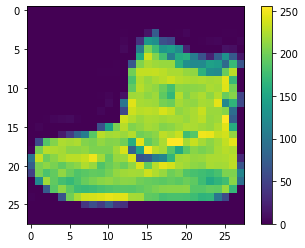

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

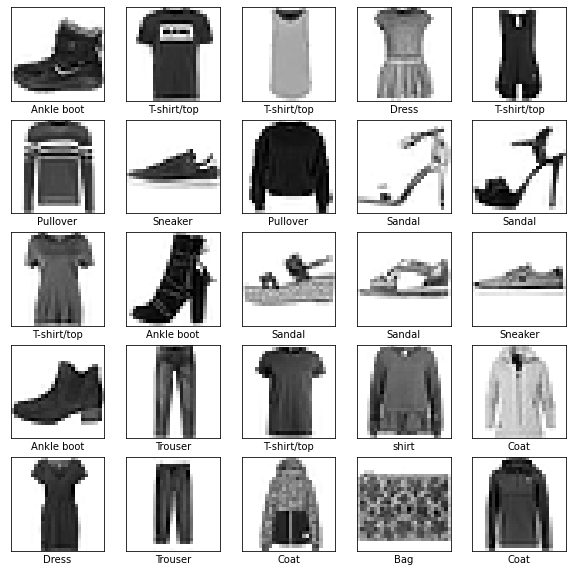

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0 #값을 0~1 사이로 재조정

plt.figure(figsize = (10,10))
for i in range(25) :
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
#모델 짜기
inputs = keras.Input(shape = (28,28))
#flatten 통해, 28*28이 1열로 바뀌게 됨.
h = layers.Flatten()(inputs)
h = layers.Dense(128)(h)
#10가지 클래스로 분류해야 하기에, 10가지 클래스마다 점수를 뽑게 해야 함
#각 클래스마다 점수 부여를, (10)(h)
#클래스마다 점수를 부여할 때, 전체 합이 일정치 않거나 해석하기 힘든 형태
#이 전체 합을 1로 만드는 것이 softmax
outputs = layers.Dense(10)(h)
outputs = layers.Activation('softmax')(outputs)

model = keras.Model(inputs = inputs, outputs = outputs)


In [17]:

#loss를 계산하는 '카테고리컨 크로센트로피'
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5, validation_split = 0.1)
#실행시, accuracy(클래스를 맞춘 비율)이 점차 증가함을 볼 수 있다.

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\n테스트 정확도 - ', test_acc)

Epoch 1/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4604 - accuracy: 0.8393 - val_loss: 0.4503 - val_accuracy: 0.8388
Epoch 2/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4497 - accuracy: 0.8441 - val_loss: 0.4425 - val_accuracy: 0.8415
Epoch 3/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4411 - accuracy: 0.8468 - val_loss: 0.4369 - val_accuracy: 0.8448
Epoch 4/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4345 - accuracy: 0.8488 - val_loss: 0.4327 - val_accuracy: 0.8487
Epoch 5/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4297 - accuracy: 0.8512 - val_loss: 0.4334 - val_accuracy: 0.8460
313/313 - 0s - loss: 0.4653 - accuracy: 0.8333

테스트 정확도 -  0.833299994468689


In [19]:
predictions = model.predict(test_images)
predictions[0]
# output을 10개가 나오도록 함. 각 클래스마다의 점수.
# 이중 최대값이, 0번째 그림의 클래스를 의미하게 됨.
# 10개의 클래스 중 가장 큰 수를 구한다.
np.argmax(predictions[0]) # [0] 배열 내에서, 9번째 idx값이 가장 크다는 걸 알려줌

# 10개의 옷 품목에 상응하는 모델의 신뢰도를 나타내는 것 중 9번째 레이블이 가장 신뢰도를 가짐

9

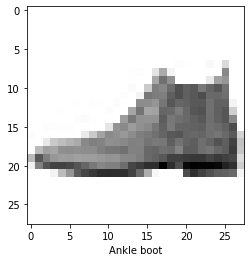

In [20]:
plt.imshow(test_images[0], cmap = plt.cm.binary)
plt.xlabel(class_names[np.argmax(predictions[0])])
plt.show()

# 실제 이미지는 아래와 같고, x축에는 배열 내에서 가장 높은 신뢰도를 가진 [9]의 string을 썼다.
# 실제로 ankle boot와 가장 맞는 것을 알수있다